<a href="https://colab.research.google.com/github/chauhan557/customer-churn-analysis/blob/main/Customer_Churn_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets(Excel)/Churn_Modelling_EDA.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Check the various attributes like rows and columns

In [ ]:
df.shape

(7043, 21)

Different columns name

In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

Check the data types of all the column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Checking the descreptive stats on numerical data

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


We do not consider senior citizen as this point as it it has only **(0,1)** Values 0 means **Non-Senior**  1 Means **Senior**

*   Average Monthly charges are 64.76 USD
*   25% Of people pays more than 89.85 USD



No. Of churn and non-churn customers

In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


percentage of churn and non churn customers

In [ ]:
df['Churn'].value_counts()/len(df['Churn'])*100

,count
Churn,
No,73.463013
Yes,26.536987


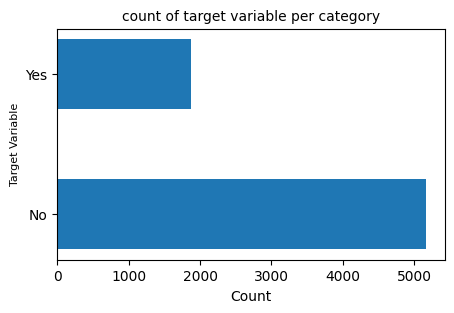

In [ ]:
x=df['Churn'].unique()
y=df['Churn'].value_counts()


plt.figure(figsize=(5,3))
plt.barh(x,y,height=0.5)

plt.xlabel("Count")
plt.ylabel("Target Variable",fontsize=8)
plt.title("count of target variable per category",fontsize=10)


plt.show()


*  Data is highly imbalanced in the ratio of 73:23





# **DATA CLEANING**



1.   Create a copy of Original Data



In [ ]:
new_df= df.copy()



*  Total charges is in Object Datatype , Convert it into numerical




In [ ]:
new_df.TotalCharges = pd.to_numeric(new_df.TotalCharges, errors = 'coerce')
new_df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


As we can see there are 11 null values in TotalCharges

In [ ]:
new_df.loc[new_df['TotalCharges'].isnull()==True]
# Below are the columns where total charges are null

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**2.Missing Value Tretament**

Since %age of missing value is less than 0.15% so we drop the missinng rows

In [ ]:
# Removing missing values
new_df.dropna(how = 'any', inplace = True)

Divide the customers into bins based on tenure for eg-: tenure  less than 12 months assign the tenure group 1-12 for tenure between this period 13-24 and so on......

In [ ]:
# Get the max tenure for creating a bin according to the size
print(new_df['tenure'].max())

72


In [ ]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
print(labels)


['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']


In [ ]:
new_df["tenure_group"] = pd.cut(new_df.tenure, range(1,80,12),right=False, labels = labels)

In [ ]:
new_df.tenure_group.value_counts()

,count
tenure_group,
1 - 12,2175
61 - 72,1407
13 - 24,1024
25 - 36,832
49 - 60,832
37 - 48,762


3. Remove the column which are not required

In [ ]:
new_df.drop(columns=['customerID'],axis=1,inplace=True)
#  we remove the customer id

In [ ]:
new_df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


#Data Exploration >

1. Plot the distribution of idividuals predictiors by churn

**Univariate analysis**

In [ ]:
for i, predictor in enumerate(new_df.drop(columns=['Churn', 'TotalCharges','MonthlyCharges','tenure'])):
    plt.figure(i)
    sns.countplot(data=new_df, x= predictor, hue= 'Churn')

In [ ]:
new_df.gender.value_counts()

,count
gender,
Male,3549
Female,3483


In [ ]:
new_df.gender.value_counts()/len(new_df.gender)*100

,count
gender,
Male,50.469283
Female,49.530717


<Axes: xlabel='gender', ylabel='count'>

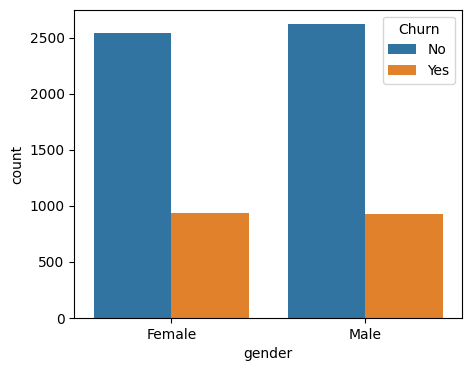

In [ ]:
x = ('gender')
y = ('Churn')

plt.figure(figsize=(5,4))

sns.countplot(data=new_df, x= x, hue= y)

*Almost 26% of females and 26% of males are likely to churn*

In [ ]:
new_df.SeniorCitizen.value_counts()

,count
SeniorCitizen,
0,5890
1,1142


<Axes: xlabel='SeniorCitizen', ylabel='count'>

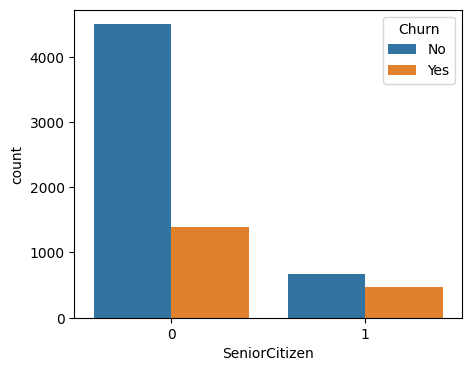

In [ ]:
x = ('SeniorCitizen')
y = ('Churn')

plt.figure(figsize=(5,4))

sns.countplot(data=new_df, x= x, hue= y)



*     Almost 22% people who are non-senoir citizen are churning
*    Almost 40% of senior citizen are churning



In [ ]:
new_df.Contract.value_counts()

,count
Contract,
Month-to-month,3875
Two year,1685
One year,1472


<Axes: xlabel='Contract', ylabel='count'>

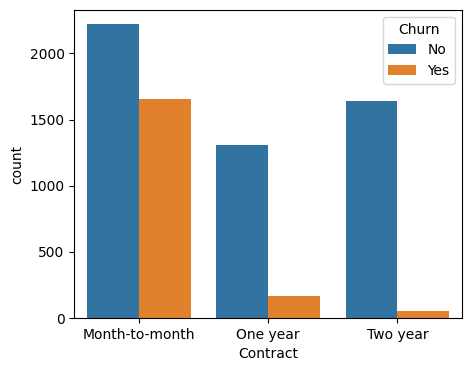

In [ ]:
x = ('Contract')
y = ('Churn')

plt.figure(figsize=(5,4))

sns.countplot(data=new_df, x = x, hue= y)

 * Customers that have month to month contract are more likely to churn almost 41%
 * Almost 13% churn rate for 1 year contract
 * Customers who have two years contract the churn is very less almost 5%


In [ ]:
new_df.PaymentMethod.value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1604
Bank transfer (automatic),1542
Credit card (automatic),1521


<Axes: xlabel='PaymentMethod', ylabel='count'>

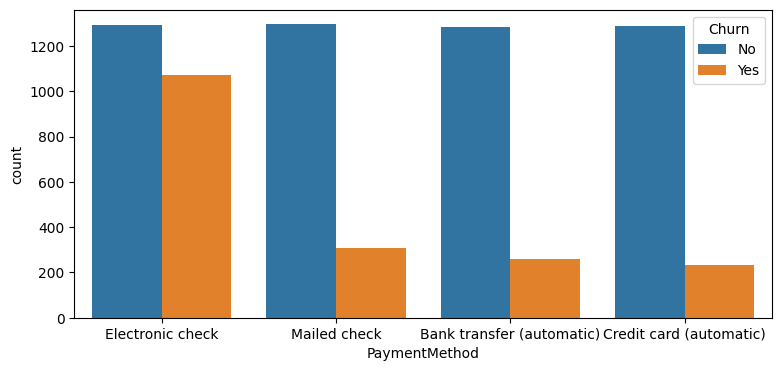

In [ ]:
x = ('PaymentMethod')
y = ('Churn')

plt.figure(figsize=(9,4))


sns.countplot(data=new_df, x = x, hue= y)

* Amlost 48% of customers are likely to churn that have pay through electronic check
* For other payment method the churn ratio is almost same which is 18%

In [ ]:
new_df.tenure_group.value_counts()

,count
tenure_group,
1 - 12,2175
61 - 72,1407
13 - 24,1024
25 - 36,832
49 - 60,832
37 - 48,762


<Axes: xlabel='tenure_group', ylabel='count'>

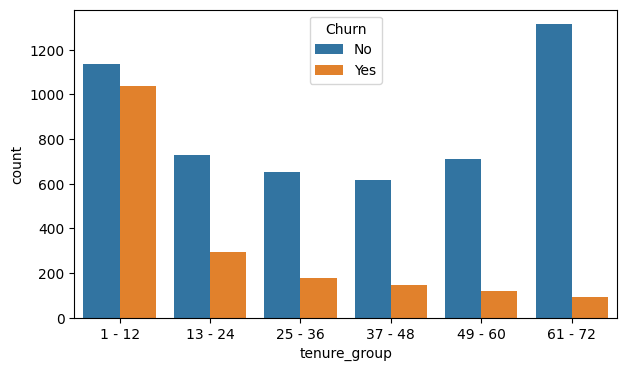

In [ ]:
x = ('tenure_group')
y = ('Churn')

plt.figure(figsize=(7,4))


sns.countplot(data=new_df, x = x, hue= y)

* Customers who have tenure Between 1-12 years are more likely to churn i.e. 48%

**Numerical Analysis**

In [ ]:
new_df.gender.value_counts()

,count
gender,
Male,3555
Female,3488


In [ ]:
new_df_target0=new_df[new_df['Churn']=='No']
new_df_target1=new_df[new_df['Churn']=='Yes']

In [ ]:
new_df_target1.gender.value_counts()

,count
gender,
Female,939
Male,930


In [ ]:
pd.crosstab(new_df.PaymentMethod, new_df.Churn, margins=True)


Churn,No,Yes,All
PaymentMethod,,,
Bank transfer (automatic),1286,258,1544
Credit card (automatic),1290,232,1522
Electronic check,1294,1071,2365
Mailed check,1304,308,1612
All,5174,1869,7043


Convert the target variable 'Churn' into a binary numeric variable i.e Yes=1 , No=0

In [ ]:
new_df['Churn']=np.where(new_df['Churn'] == 'Yes',1,0)
new_df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


Convert the categorical variable into dummy variable

In [ ]:
new_df_dummies = pd.get_dummies(new_df)
new_df_dummies.head(10)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
5,0,8,99.65,820.50,1,False,False,False,False,False,...,True,True,False,False,False,True,False,False,True,False
6,0,22,89.10,1949.40,0,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
7,0,10,29.75,301.90,0,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True
8,0,28,104.80,3046.05,1,False,False,False,False,False,...,True,True,False,False,False,True,False,False,True,False
9,0,62,56.15,3487.95,0,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,False


Churn by monthly charges and total charges

Text(0.5, 1.0, 'Monthly charges by churn')

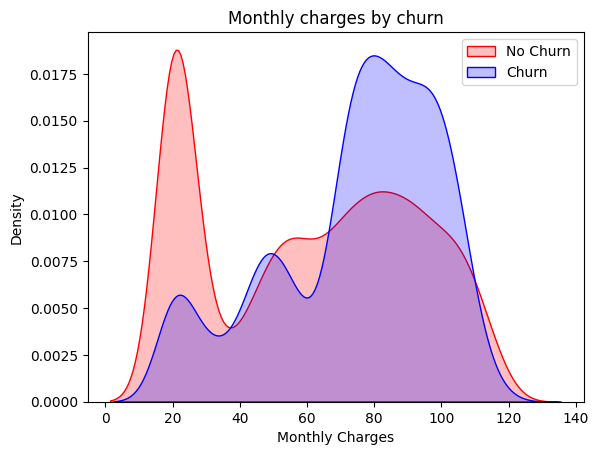

In [ ]:
mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies['Churn']==0)],
                  color='red',  fill= True)
mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies['Churn']==1)],
                  color='blue', fill= True)

mth.legend(["No Churn","Churn"],loc = 'upper right')
mth.set_ylabel('Density')
mth.set_xlabel('Monthly Charges')
mth.set_title('Monthly charges by churn')



Thw churn rate is high when the monthly charges are high and the no churn is high when the monthly charges are low

Text(0.5, 1.0, 'Total charges by churn')

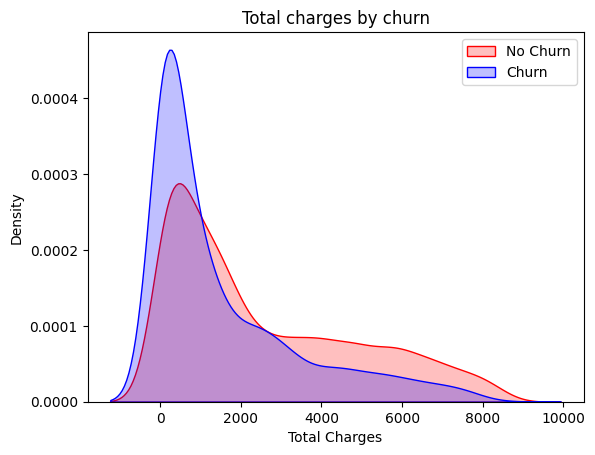

In [ ]:
Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies['Churn']==0)],
                  color='red',  fill= True)
Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies['Churn']==1)],
                  color='blue', fill= True)

Tot.legend(["No Churn","Churn"],loc = 'upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

Higher churners even at lower total charges

# **Conclusion**

* Electronic check medium are higest churers
* Contract Type - Month on Month customers are more likely to churn
* Non Senior citizen are higher churners
* No online security no tech support are higher churners